In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from collections import Counter
sns.set_style('white')

In [3]:
#############KOURAMI##############
def kourami(infile):
    db = {}
    with open(infile, 'r') as fin:
        for line in fin:
            l = line.strip().split()
            try:
                allele = l[0]
            except IndexError:
                continue
            gene = re.search('[^*]+',allele).group(0)
            fields = re.search('..:[^:]+',allele).group(0)
            if gene in ['A','B','C']:
                gene = 'HLA-' + gene
            if gene not in db:
                db[gene] = {0:'',1:'',2:''}
            if ';' in allele:
                db[gene][2] += allele
            elif db[gene][0] == '':
                db[gene][0] = fields
            else:
                db[gene][1] = fields
    return db

##############PHLAT##############
def phlat(infile):
    db = {}
    with open(infile, 'r') as fin:
        for line in fin:
            l = line.strip().split()
            if l[0] == 'Locus':
                continue
            try:
                allele_1 = l[1]
                allele_2 = l[2]
            except IndexError:
                continue
            gene = re.search('[^*]+',allele_1).group(0)
            if gene in ['A','B','C']:
                gene = 'HLA-' + gene
            if gene not in db:
                db[gene] = {0:'',1:''}
            fields = re.search('..:[^:]+',allele_1).group(0)
            db[gene][0] = fields
            fields = re.search('..:[^:]+',allele_2).group(0)
            db[gene][1] = fields
    return db

##############HLAHD##############
def hlahd(infile):
    db = {}
    with open(infile, 'r') as fin:
        for line in fin:
            l = line.strip().split()
            try:
                gene = l[0]
                allele_1 = l[1]
                allele_2 = l[2]
            except IndexError:
                continue
            if gene not in ['A','B','C','DQA1','DQB1','DRB1']:
                continue
            if gene in ['A','B','C']:
                gene = 'HLA-' + gene
            if gene not in db:
                db[gene] = {0:'',1:''}
            try:
                fields = re.search('..:[^:]+',allele_1).group(0)
            except AttributeError:
                fields = ''
            db[gene][0] = fields
            try:
                fields = re.search('..:[^:]+',allele_2).group(0)
            except AttributeError:
                fields = ''
            db[gene][1] = fields
    return db

def combine(k1,k2,ke,p1,p2,h1,h2):
    first, second = '',''
    if k1 != '' and (k1 in [p1,p2] or k1 in [h1,h2]):
        first = k1
        if p1 == k1:
            p1 = ''
        elif p2 == k1:
            p2 = ''
        if h1 == k1:
            h1 = ''
        elif h2 == k1:
            h2 = ''
        k1 = ''
    elif k2 != '' and (k2 in [p1,p2] or k2 in [h1,h2]):
        first = k2
        if p1 == k2:
            p1 = ''
        elif p2 == k2:
            p2 = ''
        if h1 == k2:
            h1 = ''
        elif h2 == k2:
            h2 = ''
        k2 = ''
    elif p1 != '' and p1 in [h1,h2]:
        first = p1
        if h1 == p1:
            h1 = ''
        elif h2 == p1:
            h2 = ''
        p1 = ''
    elif p2 != '' and p2 in [h1,h2]:
        first = p2
        if h1 == p2:
            h1 = ''
        elif h2 == p2:
            h2 = ''
        p2 = ''
    if k1 != '' and (k1 in [p1,p2] or k1 in [h1,h2]):
        second = k1
        if p1 == k1:
            p1 = ''
        elif p2 == k1:
            p2 = ''
        if h1 == k1:
            h1 = ''
        elif h2 == k1:
            h2 = ''
        k1 = ''
    elif k2 != '' and (k2 in [p1,p2] or k2 in [h1,h2]):
        second = k2
        if p1 == k2:
            p1 = ''
        elif p2 == k2:
            p2 = ''
        if h1 == k2:
            h1 = ''
        elif h2 == k2:
            h2 = ''
        k2 = ''
    elif p1 != '' and p1 in [h1,h2]:
        second = p1
        if h1 == p1:
            h1 = ''
        elif h2 == p1:
            h2 = ''
        p1 = ''
    elif p2 != '' and p2 in [h1,h2]:
        second = p2
        if h1 == p2:
            h1 = ''
        elif h2 == p2:
            h2 = ''
        p2 = ''
    return first, second

In [20]:
x1, x2, x3, x4, x5 = [], [], [], [], []
for index in range(34,93):
    sample = 'BTN-0{}'.format(index)
    genes = ['HLA-A','HLA-B','HLA-C','DQA1','DQB1','DRB1']
    infile = '/home/harald/projects/somatic/test_samples/hla_alleles/BTN-0{}.result'.format(index)
    try:
        ko = kourami(infile)
    except FileNotFoundError:
        continue
    infile = '/home/harald/projects/somatic/test_samples/hla_alleles/BTN_0{}_PHLAT_final.result.txt'.format(index)
    ph = phlat(infile)
    infile = '/home/harald/projects/somatic/test_samples/hla_alleles/BTN_0{}_HLAHD_final.result.txt'.format(index)
    hl = hlahd(infile)
    for gene in genes:
        try:
            k1, k2, ke = ko[gene][0], ko[gene][1], ko[gene][2]
        except KeyError:
            k1, k2, ke = '','',''
        try:
            p1, p2 = ph[gene][0], ph[gene][1]
        except KeyError:
            p1, p2 = '', ''
        try:
            h1, h2 = hl[gene][0], hl[gene][1]
        except KeyError:
            h1, h2 = '', ''
        first, second = combine(k1, k2, ke, p1, p2, h1, h2)
        try:
            a1,a2 = first.split(':')
        except ValueError:
            a1, a2 = np.nan,np.nan
        if gene.startswith('HLA-'):
            gene = gene[4:]
        x1.append(sample)
        x2.append(gene)
        x3.append(1)
        x4.append(a1)
        x5.append(a2)
        try:
            b1,b2 = second.split(':')
        except ValueError:
            b1,b2 = np.nan,np.nan
        x1.append(sample)
        x2.append(gene)
        x3.append(2)
        x4.append(b1)
        x5.append(b2)

df = pd.DataFrame({'Sample':x1,'Gene':x2,'Allele':x3,'Field1':x4,'Field2':x5})
#df = df.sort_values(by=['Sample','Gene','Allele','Field1','Field2'])

In [22]:
df

,Sample,Gene,Allele,Field1,Field2
0,BTN-034,A,1,33,03
1,BTN-034,A,2,33,03
2,BTN-034,B,1,44,03
3,BTN-034,B,2,18,02
4,BTN-034,C,1,07,04
5,BTN-034,C,2,07,06
6,BTN-034,DQA1,1,02,01
7,BTN-034,DQA1,2,06,01
8,BTN-034,DQB1,1,02,02
9,BTN-034,DQB1,2,03,01


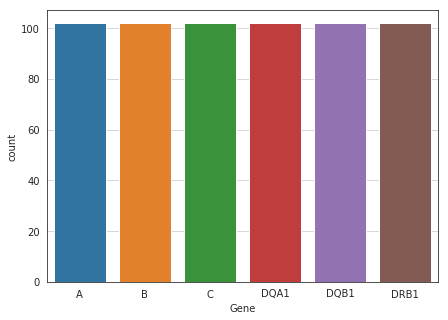

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7,5))
sns.countplot(x='Gene', data=df, ax=axes)
axes.grid(axis='y')
fig.savefig('HLA-alleles_distribution.png')

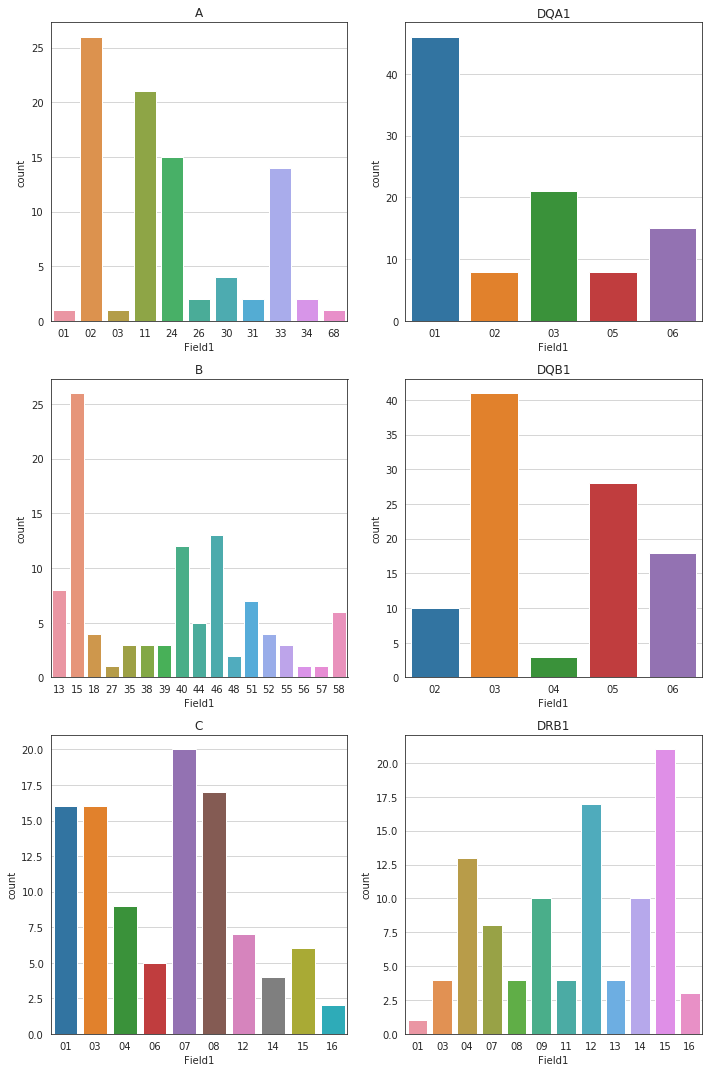

In [24]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,15))
genes = ['A','B','C','DQA1','DQB1','DRB1']
for i, gene in enumerate(genes):
    c = i // 3
    r = i % 3
    df1 = df[df['Gene']==gene].sort_values(by=['Field1','Field2'])
    sns.countplot(x='Field1', data = df1, ax = axes[r,c])
    axes[r,c].set_title(gene)
    axes[r,c].grid(axis='y')
plt.tight_layout()
fig.savefig('HLA-alleles_distribution_gene.png')

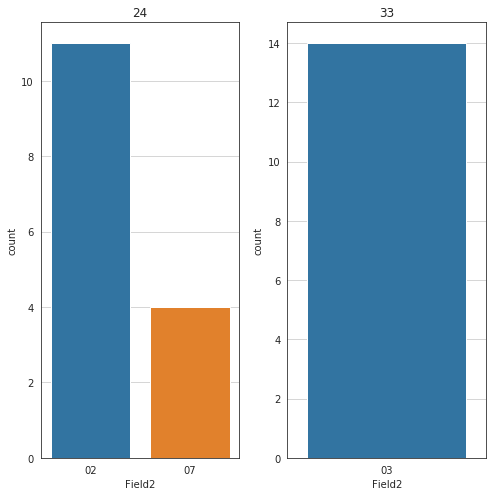

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,7))
gene = 'A'
fields = ['24', '33']
for i, field in enumerate(fields):
    df1 = df[(df['Gene']==gene) & (df['Field1'] == field)]
    sns.countplot(x='Field2', data = df1, ax = axes[i])
    axes[i].set_title(field)
    axes[i].grid(axis='y')
plt.tight_layout()
fig.savefig('HLA-alleles_distribution_loci.png')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 5 columns):
Sample    354 non-null object
Gene      354 non-null object
Allele    354 non-null object
Field1    354 non-null object
Field2    354 non-null object
dtypes: object(5)
memory usage: 13.9+ KB
